In [10]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
yeni_hal = pd.read_csv("yeniden_duzenlenmis_hal_fiyatlari.csv")
yeni_hal

,_id,tarih,urun_ad,birim,tur,en_dusuk_fiyat,en_yuksek_fiyat,ortalama_fiyat
0,1,2004-03-02T00:00:00,ARMUT( Ankara ),Kg,1,1.60,1.70,1.650
1,2,2004-03-02T00:00:00,AYVA,Kg,1,0.55,0.30,0.425
2,3,2004-03-02T00:00:00,BAKLA,Kg,0,1.60,1.80,1.700
3,4,2004-03-02T00:00:00,BİBER (Çarli),Kg,0,1.10,1.30,1.200
4,5,2004-03-02T00:00:00,BİBER (Dolma),Kg,0,1.10,1.55,1.325
...,...,...,...,...,...,...,...,...
121835,121836,2023-12-25T00:00:00,ELMA (Arjantin),Kg,1,20.00,32.00,26.000
121836,121837,2023-12-25T00:00:00,GREYFURT,Kg,1,6.00,11.00,8.500
121837,121838,2023-12-25T00:00:00,YER ELMASI,Kg,1,18.00,20.00,19.000
121838,121839,2023-12-25T00:00:00,KARPUZ (Muhtelif),Kg,1,28.00,38.00,33.000


In [14]:
yeni_hal.dtypes

_id                  int64
tarih               object
urun_ad             object
birim               object
tur                  int64
en_dusuk_fiyat     float64
en_yuksek_fiyat    float64
ortalama_fiyat     float64
dtype: object

In [17]:
satir_sayisi = yeni_hal.shape[0]

print("Satır Sayısı:", satir_sayisi)

Satır Sayısı: 119141


In [13]:
yeni_hal.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,119141.0,60455.146625,35048.304946,1.0,30097.00,60318.0,90770.00,121840.0
tur,119141.0,0.334385,0.471777,0.0,0.00,0.0,1.00,1.0
en_dusuk_fiyat,119141.0,3.436712,9.058613,0.0,0.50,1.0,3.00,210.0
en_yuksek_fiyat,119141.0,6.016662,12.807411,0.0,1.20,2.5,5.50,260.0
ortalama_fiyat,119141.0,4.726687,10.878755,0.0,0.95,1.9,4.25,235.0


In [6]:
yeni_hal.shape

(119141, 8)

In [11]:
yeni_hal["urun_ad"].unique()

array(['ARMUT( Ankara )', 'AYVA', 'BAKLA', 'BİBER (Çarli)',
       'BİBER (Dolma)', 'BİBER Salçalık (Kapya)', 'ÇİLEK',
       'DERE OTU (Bağ)', 'ELMA (Amasya)', 'ELMA (Golden)',
       'ELMA (Muhtelif)', 'GREYFURT', 'HAVUÇ', 'ISPANAK', 'KABAK (Bal)',
       'KARNABAHAR', 'KEREVİZ', 'KİVİ', 'LAHANA (Beyaz)', 'LAHANA (Mor)',
       'PATATES', 'MAYDONOZ (Bağ)', 'MUZ (İthal)', 'MUZ (Yerli)',
       'NANE(Bağ)', 'NAR çekirdeksiz', 'PATLICAN (Kemer)',
       'PATLICAN (Topak)', 'BİBER (Kıl)', 'HIRTLAK', 'DUT',
       'DOMATES (Muhtelif)', 'DOMATES (Salkım)', 'ERİK (Muhtelif)',
       'BROKOLİ', 'BİBER (Sivri)', 'ELMA (İthal)', 'ELMA (Starking)',
       'BAMYA', 'CEVİZ', 'AVAKADO', 'HİNDİSTAN CEVİZİ(Adet)',
       'FASULYE (Muhtelif)', 'DOMATES (Salçalık)', 'BEZELYE (Araka)',
       'ENGİNAR(Adet)', 'ERİK (Can-Papaz)', 'KABAK (Kara)', 'BİBER (Cin)',
       'FESLEĞEN(REYHAN)Bağ', 'MANTAR (Kültür)', 'KABAK (Beyaz)',
       'KAVUN (Muhtelif)', 'KARPUZ (Muhtelif)', 'KİRAZ (Yerli)',
       'KİRAZ 

In [9]:
yeni_hal["urun_ad"].value_counts()

urun_ad
MUZ (İthal)            1753
BİBER (Dolma)          1752
PATLICAN (Kemer)       1751
BİBER (Çarli)          1749
ISPANAK                1743
                       ... 
ARMUT (Muhtelif)        261
MUŞMULA (Döngel)        251
PATLICAN (Yerli)        249
MANDALİNA (satsuma)     235
MANDALİN (King)         205
Name: count, Length: 120, dtype: int64

In [18]:

if 'ortalama_fiyat' in yeni_hal.columns:
    # "birim" ve "urun_ad" sütunlarına göre fiyatları toplayın
    fiyatlar_toplam = yeni_hal.groupby(["birim", "urun_ad"])["ortalama_fiyat"].sum()

    # "birim" ve "urun_ad" sütunlarına göre fiyatların ortalamasını alın
    fiyatlar_ortalama = yeni_hal.groupby(["birim", "urun_ad"])["ortalama_fiyat"].mean()

    # Sıralama işlemi
    fiyatlar_ortalama_sirali = fiyatlar_ortalama.sort_values(ascending=False)

    # Genel ortalamayı içeren yeni bir DataFrame oluşturun
    genel_ortalama_df = pd.DataFrame(fiyatlar_ortalama_sirali).reset_index()
    genel_ortalama_df.columns = ["birim", "urun_ad", "genel_ortalama_fiyat"]

    # "tum_yillarin_ortalama_verileri.csv" adında bir CSV dosyasına kaydedin
    genel_ortalama_df.to_csv('tum_yillarin_ortalama_verileri.csv', index=False)

    # Sonuçları yazdırın
    print("Fiyatlar Toplam:")
    print(fiyatlar_toplam)

    print("\nFiyatlar Ortalama (Büyükten Küçüğe Sıralı):")
    print(fiyatlar_ortalama_sirali)

    print("\nGenel Ortalama Fiyatlar:")
    print(genel_ortalama_df)
else:
    print("Veri setinde 'ortalama_fiyat' sütunu bulunamadı.")

Fiyatlar Toplam:
birim  urun_ad               
Adet   AVAKADO                    8207.375
       ENGİNAR(Adet)              1390.675
       HİNDİSTAN CEVİZİ(Adet)     9129.000
       MARUL (Aysberk)Adet       11396.310
       MARUL (Mor)Adet            8590.460
                                   ...    
Kg     ÜZÜM (Çekirdeksiz)         4304.150
       İNCİR ( Beyaz )            4794.050
       ŞEFTALİ (Muhtelif)         4174.425
       ŞEFTALİ (Nektari)          1863.900
Paket  LAHANA (Bürüksel)          1107.075
Name: ortalama_fiyat, Length: 120, dtype: float64

Fiyatlar Ortalama (Büyükten Küçüğe Sıralı):
birim  urun_ad             
Kg     ZENCEFİL (Taze )        63.819885
       MUZ (İthal)             53.323294
       ANANAS                  20.207469
       ARMUT (Muhtelif)        15.526820
       KESTANE                 12.341108
                                 ...    
Adet   MISIR (Taze)Adet         0.838964
Demet  NANE(Bağ)                0.814991
       DERE OTU (Bağ)        

ANANAS BOXPLOT

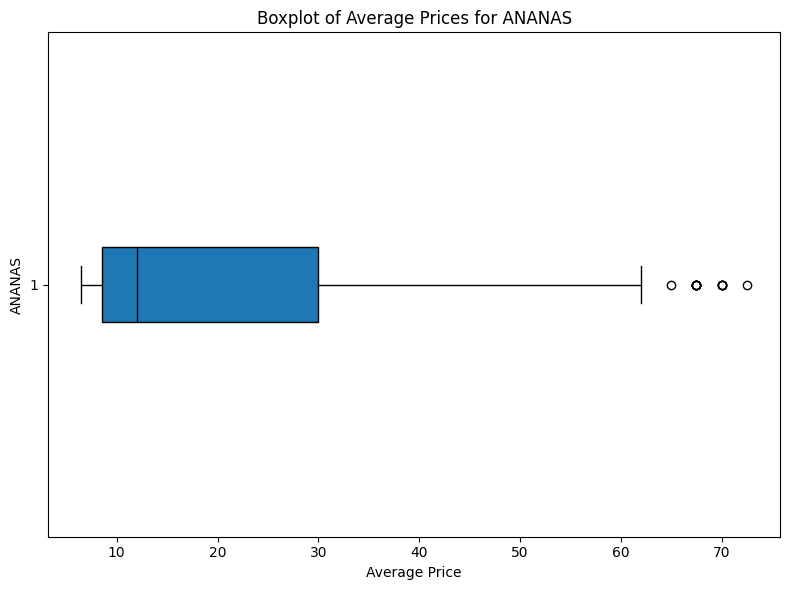

In [3]:
# Filter the DataFrame for the product "ANANAS"
ananas_values = yeni_hal[yeni_hal['urun_ad'] == '']['ortalama_fiyat'].values

# Create a boxplot for ANANAS
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(ananas_values, vert=False, patch_artist=True, medianprops={'color': 'black'})
plt.title('Boxplot of Average Prices for ANANAS')
plt.xlabel('Average Price')
plt.ylabel('ANANAS')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

MUZ(Ithal) Boxplot ve Aykiri Degerleri Temizleme


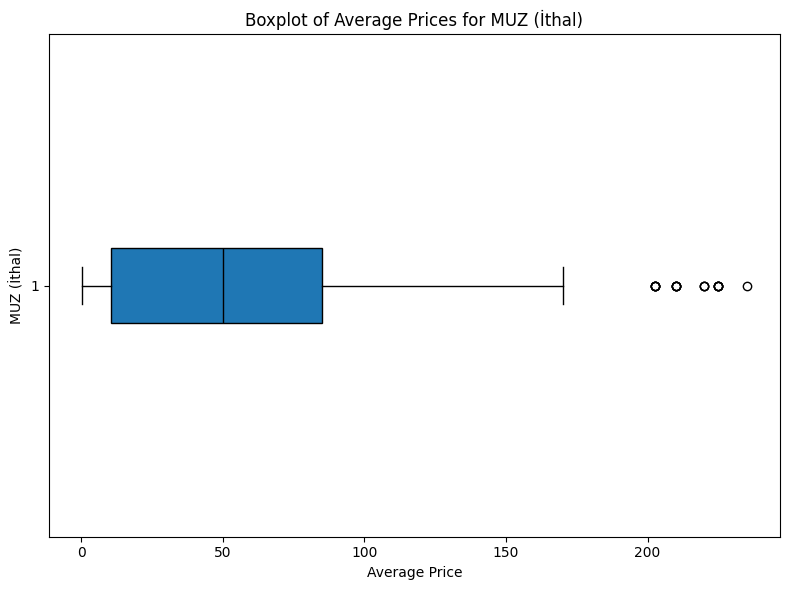

In [8]:
# Filter the DataFrame for the product "ANANAS"
ithal_muz_values = yeni_hal[yeni_hal['urun_ad'] == 'MUZ (İthal)']['ortalama_fiyat'].values

# Create a boxplot for ANANAS
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(ithal_muz_values, vert=False, patch_artist=True, medianprops={'color': 'black'})
plt.title('Boxplot of Average Prices for MUZ (İthal)')
plt.xlabel('Average Price')
plt.ylabel('MUZ (İthal)')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Q1 = ithal_muz_values.quantile(0.25)
# Q3 = ithal_muz_values.quantile(0.75)
# IQR = Q3 - Q1

Q1 = np.percentile(ithal_muz_values, 25)
Q3 = np.percentile(ithal_muz_values, 75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 10.5
Q3: 85.0
IQR: 74.5


In [13]:
alt_sinir = Q1 - 1.5*IQR
alt_sinir

-101.25

In [14]:
ust_sinir = Q3 + 1.*IQR
ust_sinir

159.5

In [15]:
(ithal_muz_values < alt_sinir) | (ithal_muz_values > ust_sinir)

array([False, False, False, ..., False, False, False])

In [21]:
aykiri_tf = (ithal_muz_values < alt_sinir) | (ithal_muz_values > ust_sinir)
aykiri_tf

array([False, False, False, ..., False, False, False])

In [22]:
ithal_muz_values[aykiri_tf]

array([170. , 170. , 170. , 170. , 170. , 170. , 170. , 170. , 170. ,
       170. , 170. , 170. , 170. , 170. , 170. , 162.5, 162.5, 170. ,
       170. , 170. , 170. , 170. , 170. , 170. , 170. , 170. , 170. ,
       170. , 170. , 170. , 170. , 170. , 170. , 170. , 170. , 170. ,
       170. , 210. , 210. , 210. , 210. , 210. , 202.5, 202.5, 202.5,
       202.5, 202.5, 225. , 225. , 225. , 225. , 225. , 220. , 220. ,
       220. , 235. ])

In [26]:
# t_df = ithal_muz_values[~((ithal_muz_values < (alt_sinir)) | (ithal_muz_values > (ust_sinir))).any(axis=1)]
t_df = ithal_muz_values[~((ithal_muz_values < alt_sinir) | (ithal_muz_values > ust_sinir))]
t_df

array([ 2.15,  2.35,  2.2 , ..., 55.  , 55.  , 55.  ])

AYKIRI DEGERLERI FOR DONGUSU ILE SILME

In [61]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Q1, Q3 ve IQR değerlerini hesaplayın
    Q1 = np.percentile(veriler['ortalama_fiyat'], 25)
    Q3 = np.percentile(veriler['ortalama_fiyat'], 75)
    IQR = Q3 - Q1

    # Ayıkırı değerleri belirleyin
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    ayikiri_tf = (veriler['ortalama_fiyat'] < alt_sinir) | (veriler['ortalama_fiyat'] > ust_sinir)

    # Ayıkırı değerleri veri setinden silin
    veriler_yeni = veriler[~ayikiri_tf]

    # Verileri dosyaya kaydedin
    veriler_yeni.to_csv('without_outlier_values.csv', index=False)

In [62]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# Boş bir DataFrame oluşturun
tum_veriler_yeni = pd.DataFrame()

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Q1, Q3 ve IQR değerlerini hesaplayın
    Q1 = np.percentile(veriler['ortalama_fiyat'], 25)
    Q3 = np.percentile(veriler['ortalama_fiyat'], 75)
    IQR = Q3 - Q1

    # Ayıkırı değerleri belirleyin
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    ayikiri_tf = (veriler['ortalama_fiyat'] < alt_sinir) | (veriler['ortalama_fiyat'] > ust_sinir)

    # Ayıkırı değerleri veri setinden silin
    veriler_yeni = veriler[~ayikiri_tf]

    # Verileri toplu bir DataFrame'e ekleyin
    tum_veriler_yeni = pd.concat([tum_veriler_yeni, veriler_yeni])

# Toplu verileri dosyaya kaydedin
tum_veriler_yeni.to_csv('without_outlier_values.csv', index=False)

In [44]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Z-skorlarını hesapla
    z_scores = (veriler['ortalama_fiyat'] - veriler['ortalama_fiyat'].mean()) / veriler['ortalama_fiyat'].std()

    # Aykırı değerleri belirle
    ayikiri_tf = np.abs(z_scores) < 3  # Örnek olarak, Z-score'a dayalı bir sınırlama

    # Aykırı olmayan değerleri yeni bir veri çerçevesine kopyala
    veriler_yeni = veriler[ayikiri_tf]

    # Verileri dosyaya kaydet
    veriler_yeni.to_csv(f'without_outlier_values_deneme.csv', index=False)

In [60]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# Aykırı olmayan verileri tutacak boş bir veri çerçevesi oluşturun
veriler_ayikiri_olmayan = pd.DataFrame()

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Z-skorlarını hesapla
    z_scores = (veriler['ortalama_fiyat'] - veriler['ortalama_fiyat'].mean()) / veriler['ortalama_fiyat'].std()

    # Aykırı değerleri belirle
    ayikiri_tf = np.abs(z_scores) < 3  # Örnek olarak, Z-score'a dayalı bir sınırlama

    # Aykırı olmayan değerleri yeni bir veri çerçevesine ekle
    veriler_ayikiri_olmayan = veriler_ayikiri_olmayan.append(veriler[ayikiri_tf])

# Aykırı olmayan verileri dosyaya kaydet
veriler_ayikiri_olmayan.to_csv('without_outlier_values_deneme.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'append'

TUM URUNLER ICIN BOXPLOT GOZLEMI

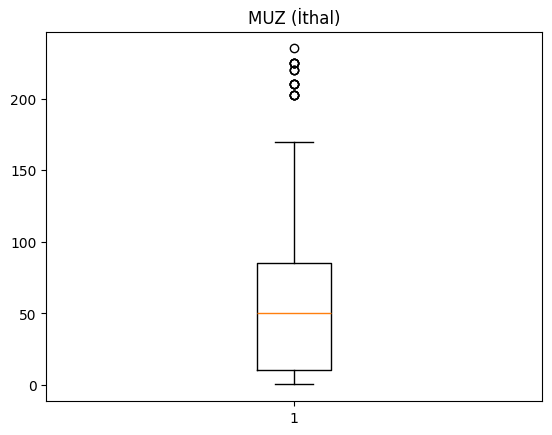

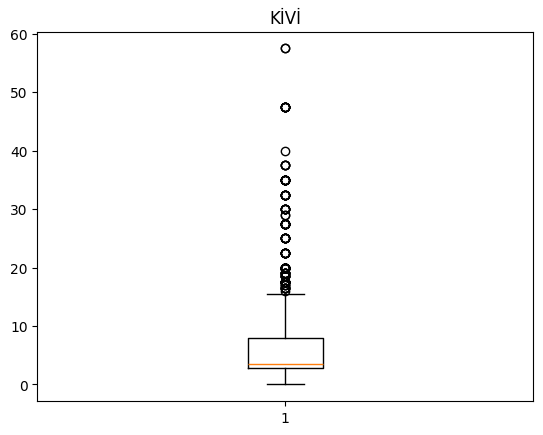

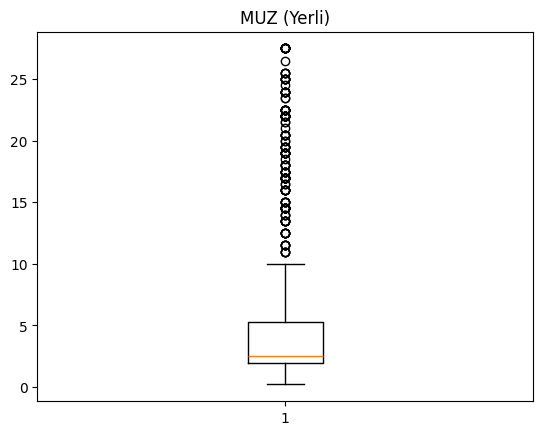

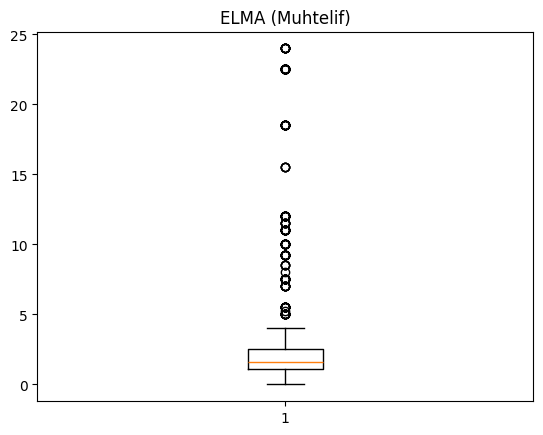

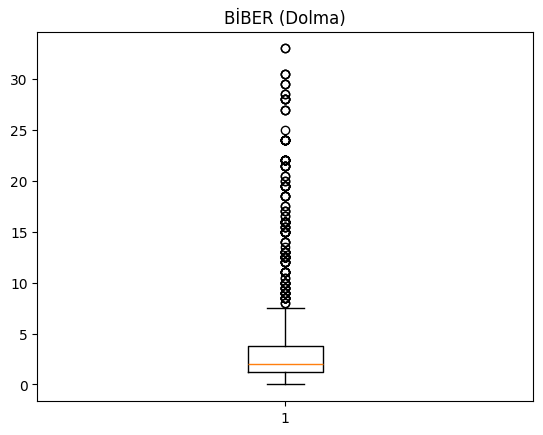

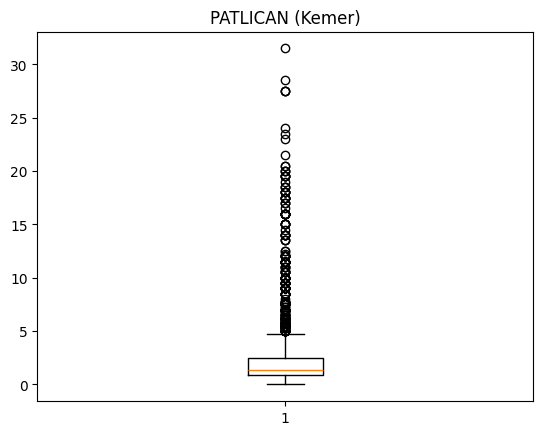

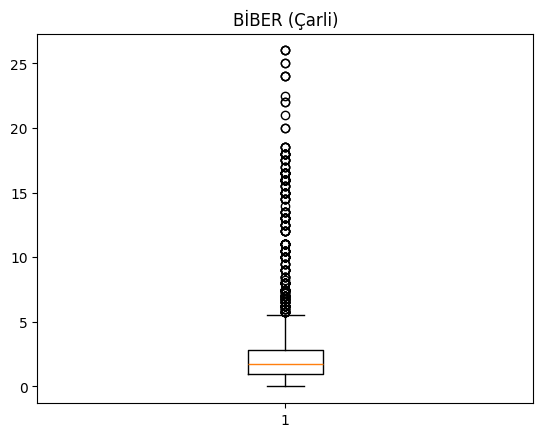

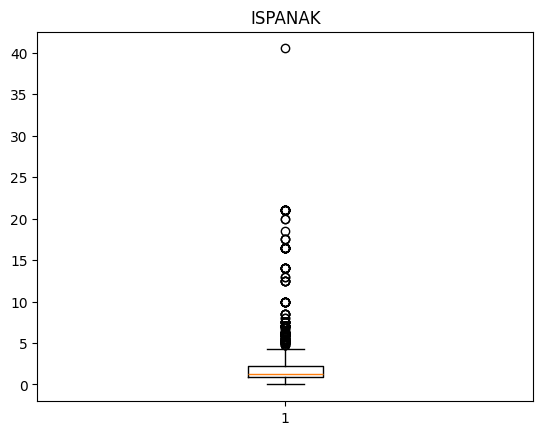

In [42]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Kutu grafiğini çizin
    plt.boxplot(veriler['ortalama_fiyat'])
    plt.title(urun)
    plt.show()

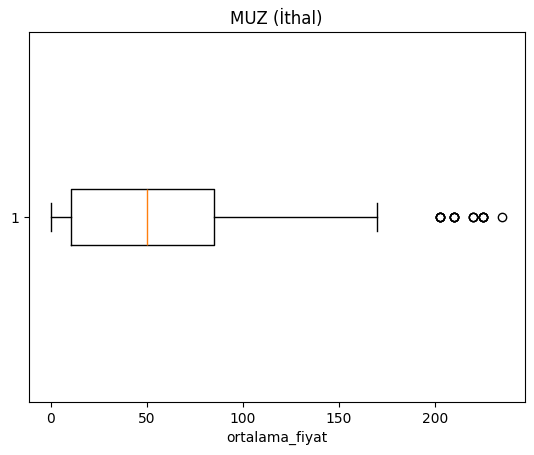

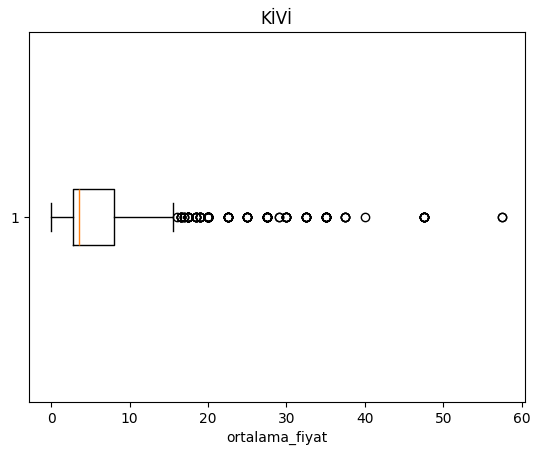

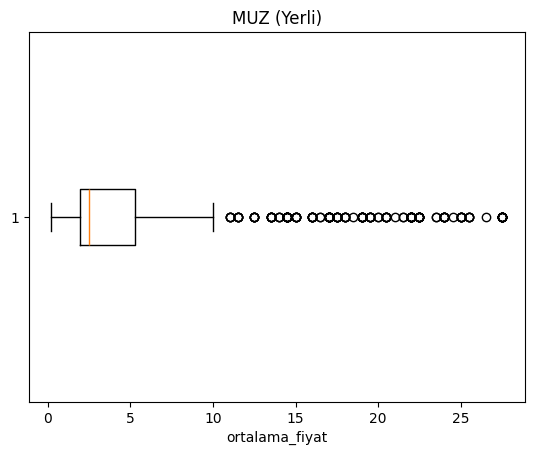

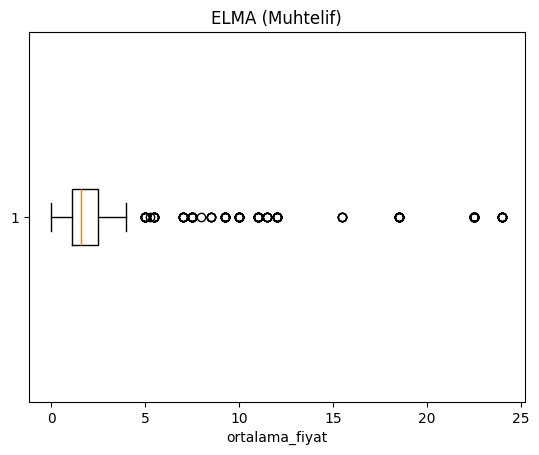

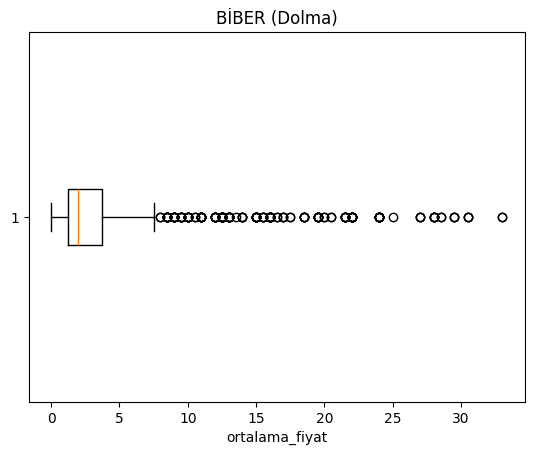

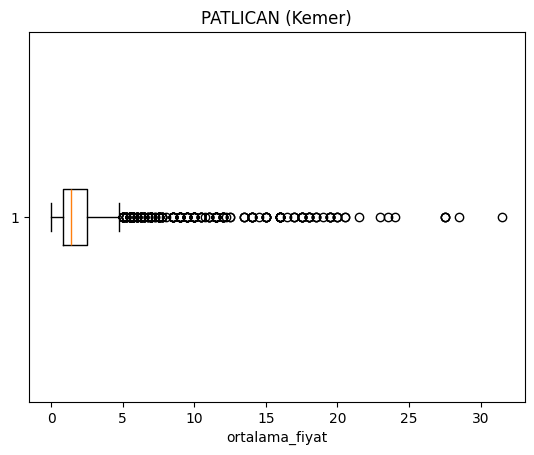

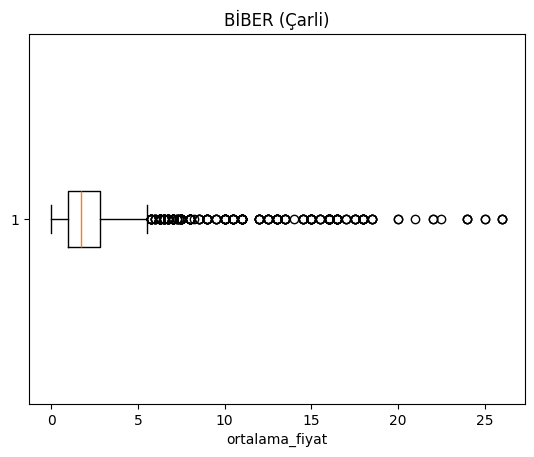

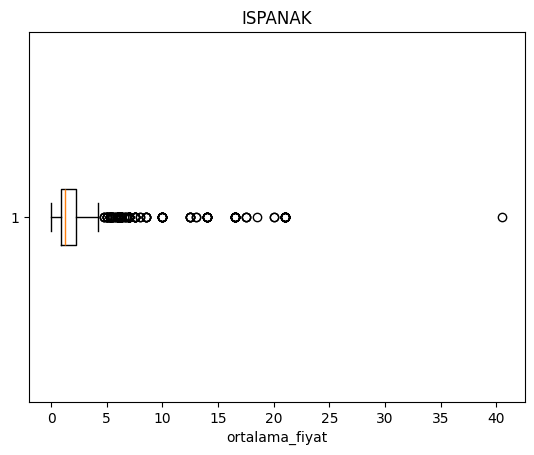

In [43]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Kutu grafiğini çizin
    plt.boxplot(veriler['ortalama_fiyat'], vert=False)  # vert=False ile yatay kutu grafiği yapılır
    plt.title(urun)
    plt.xlabel('ortalama_fiyat')  # x eksenine 'ortalama_fiyat' yazısını ekleyin
    plt.show()

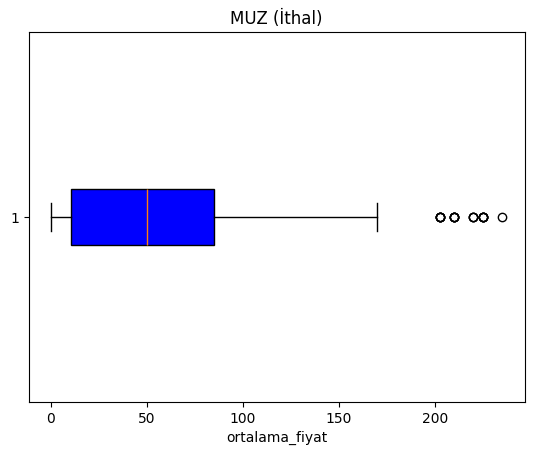

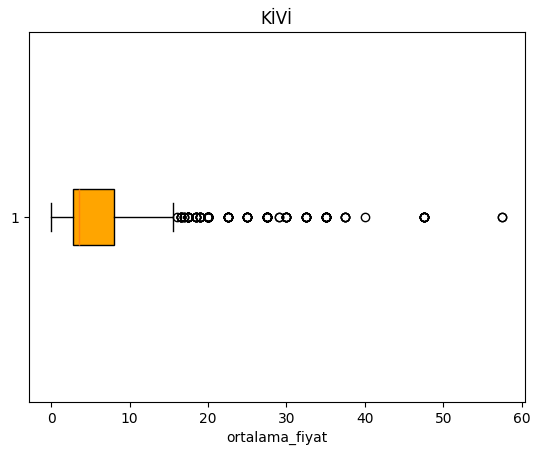

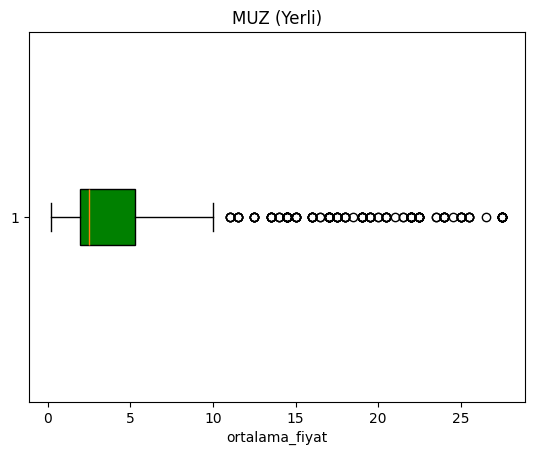

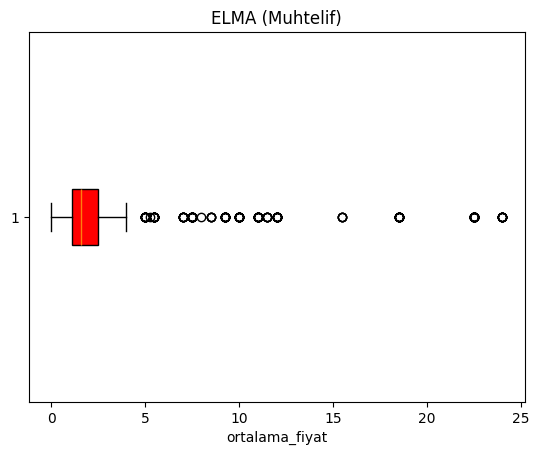

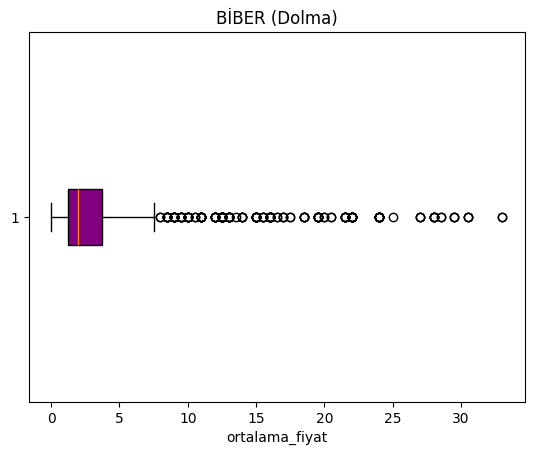

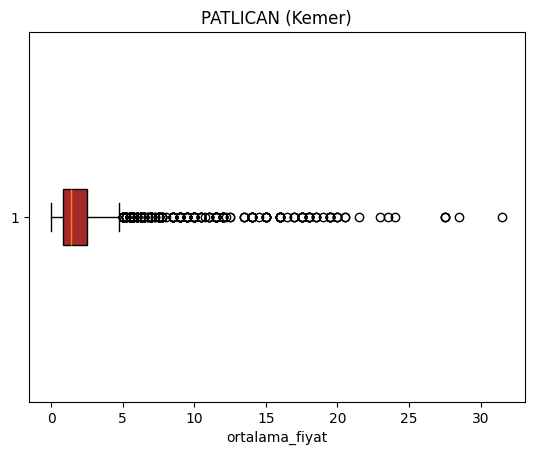

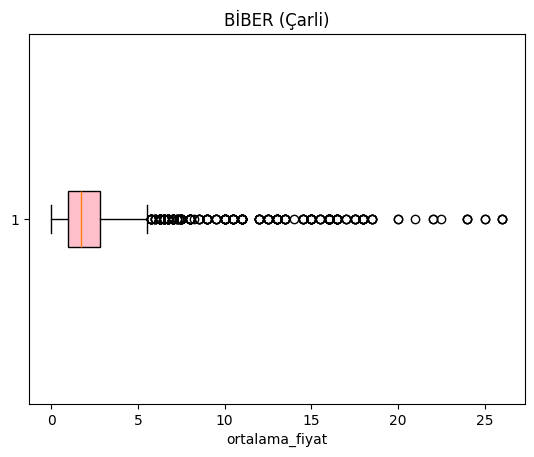

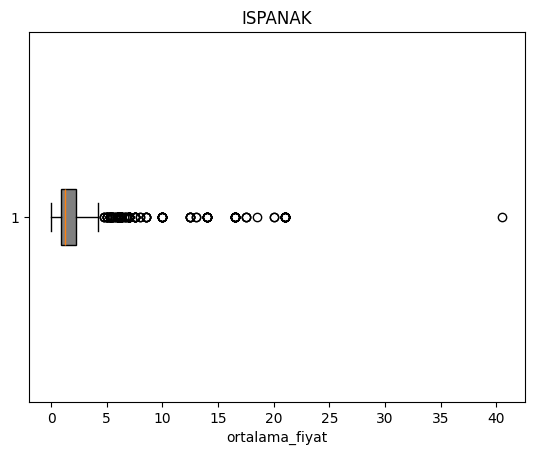

In [63]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# Renk listesi
renkler = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# For döngüsü ile ürünleri işleyin
for i, urun in enumerate(urunler):
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Kutu grafiğini çizin
    plt.boxplot(veriler['ortalama_fiyat'], vert=False, patch_artist=True, boxprops=dict(facecolor=renkler[i]))
    plt.title(urun)
    plt.xlabel('ortalama_fiyat')

    # Grafiği .png olarak kaydedin
    plt.savefig(f'{urun}_kutu_grafigi.png')

    # Grafiği gösterin
    plt.show()

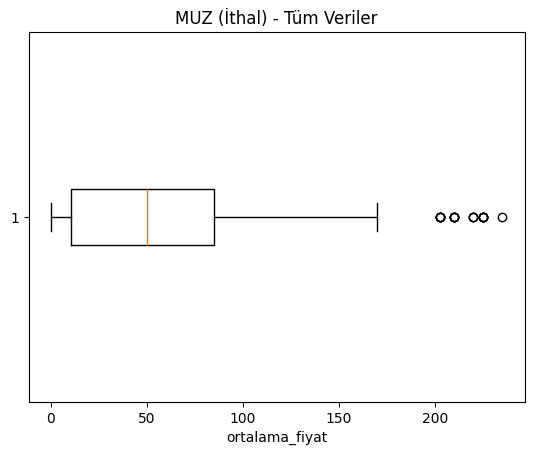

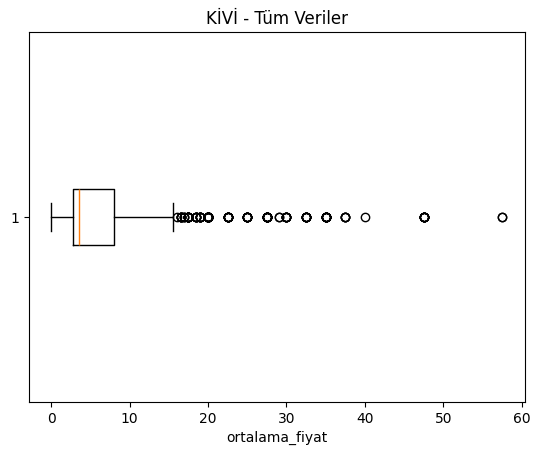

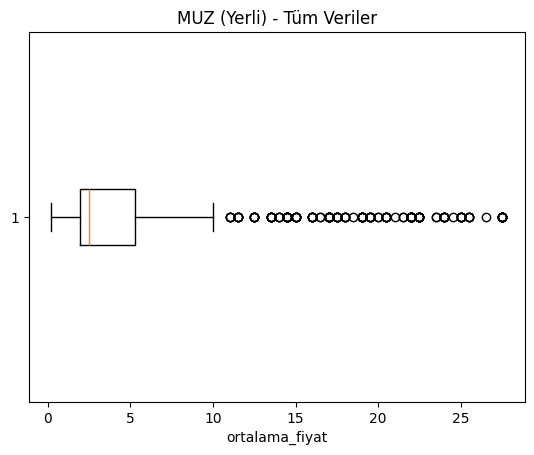

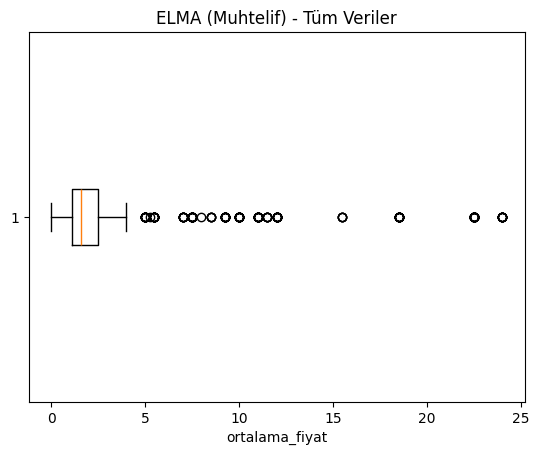

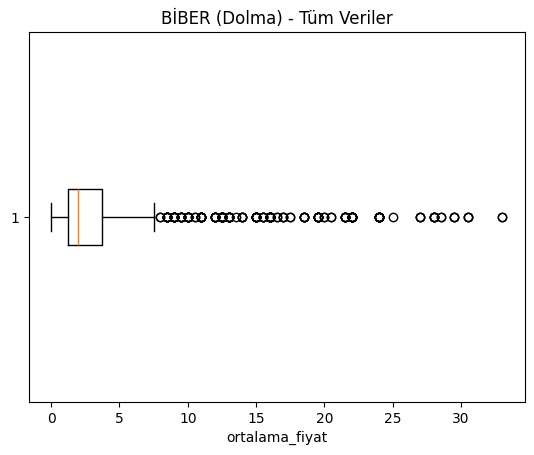

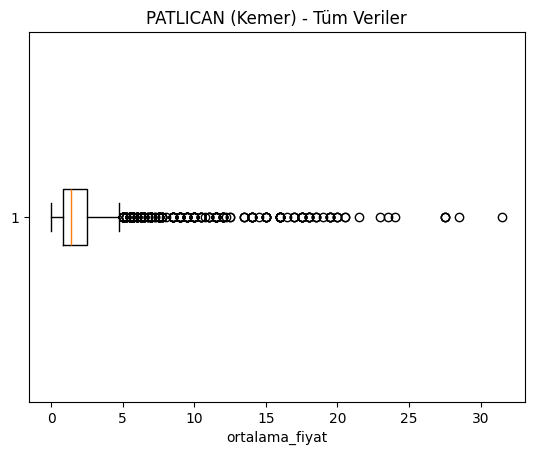

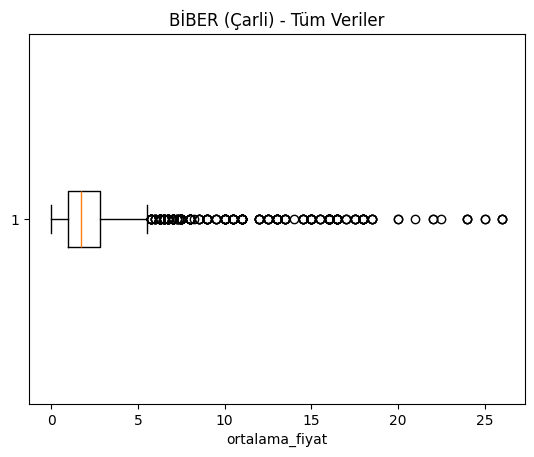

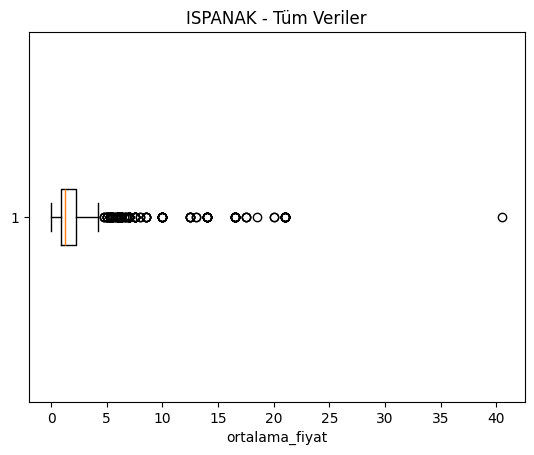

In [54]:
# Ürünleri listeleyin
urunler = ['MUZ (İthal)', 'KİVİ', 'MUZ (Yerli)', 'ELMA (Muhtelif)', 'BİBER (Dolma)', 'PATLICAN (Kemer)', 'BİBER (Çarli)', 'ISPANAK']

# Veri çerçevesini yükleyin
yeni_hal = pd.read_csv('yeniden_duzenlenmis_hal_fiyatlari.csv')

# For döngüsü ile ürünleri işleyin
for urun in urunler:
    # Verileri filtreleyin
    veriler = yeni_hal[yeni_hal['urun_ad'] == urun]

    # Z-skorlarını hesapla
    z_scores = (veriler['ortalama_fiyat'] - veriler['ortalama_fiyat'].mean()) / veriler['ortalama_fiyat'].std()

    # Aykırı olmayan değerleri seç
    ayikiri_tf = np.abs(z_scores) < 3
    veriler_ayikiri = veriler[ayikiri_tf]

    # Kutu grafiğini çizin (Tüm Veriler)
    plt.boxplot(veriler['ortalama_fiyat'], vert=False)
    plt.title(f'{urun} - Tüm Veriler')
    plt.xlabel('ortalama_fiyat')
    plt.show()

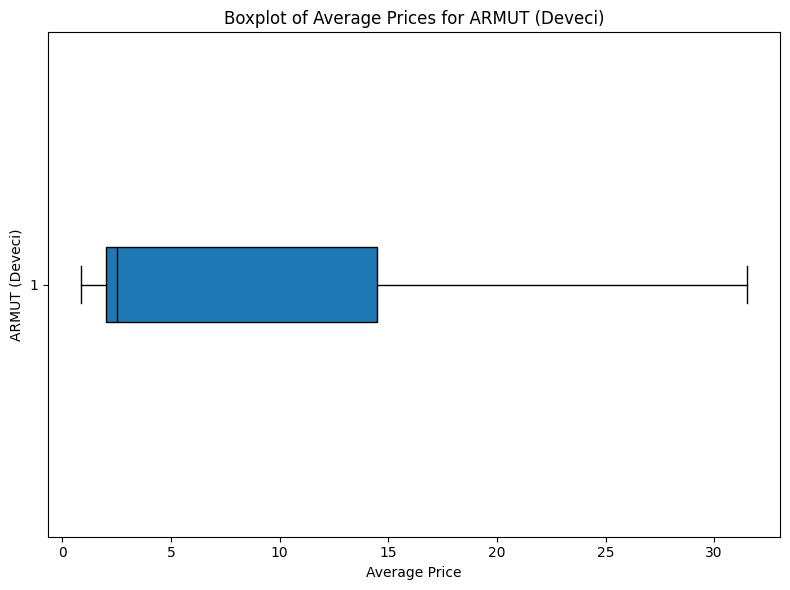

In [6]:
# Filter the DataFrame for the product "ANANAS"
ananas_values = yeni_hal[yeni_hal['urun_ad'] == 'ARMUT (Deveci)']['ortalama_fiyat'].values

# Create a boxplot for ANANAS
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(ananas_values, vert=False, patch_artist=True, medianprops={'color': 'black'})
plt.title('Boxplot of Average Prices for ARMUT (Deveci)')
plt.xlabel('Average Price')
plt.ylabel('ARMUT (Deveci)')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

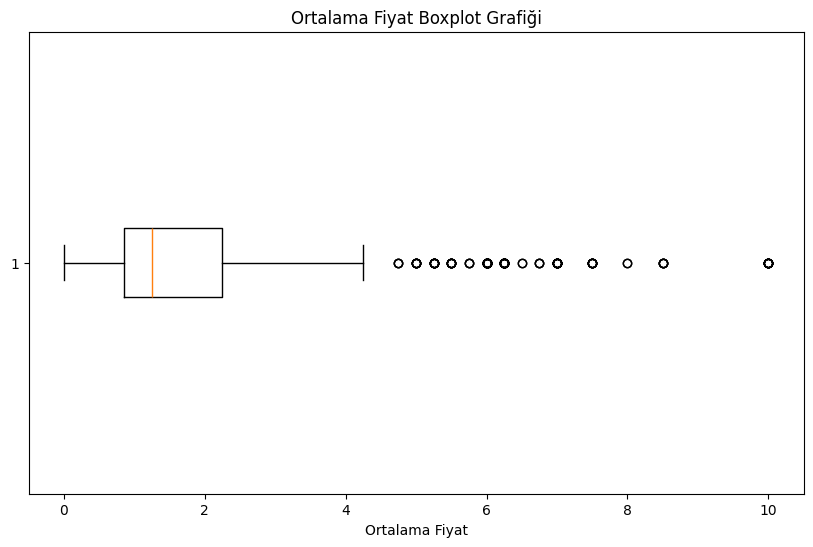

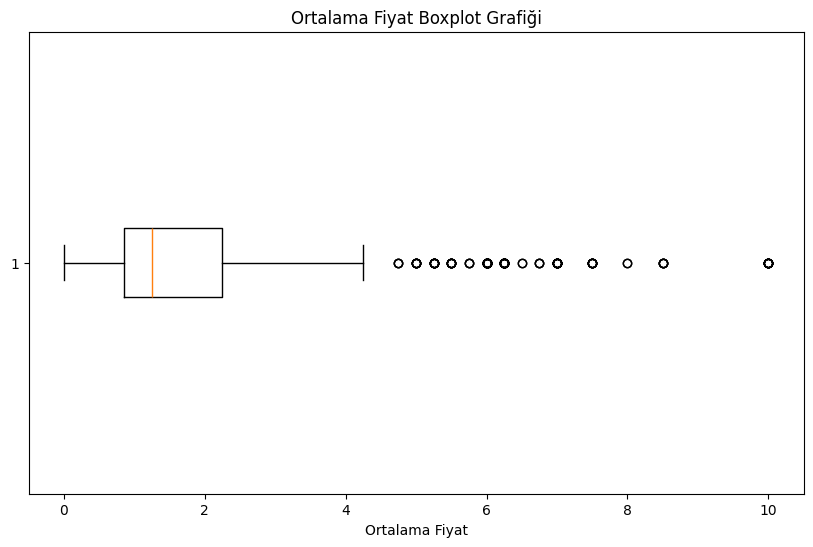

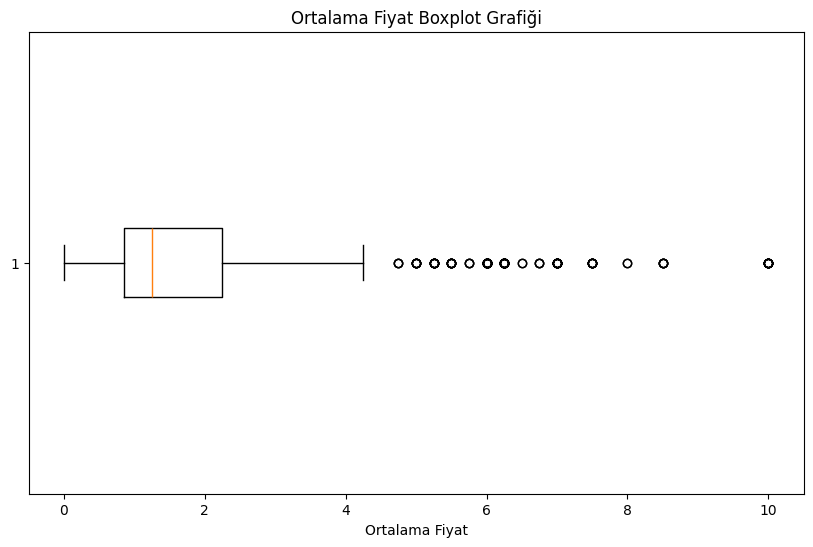

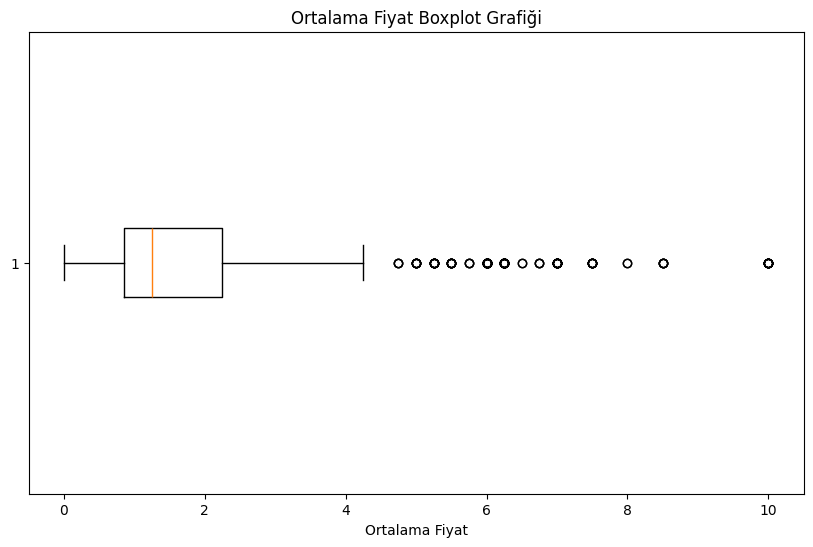

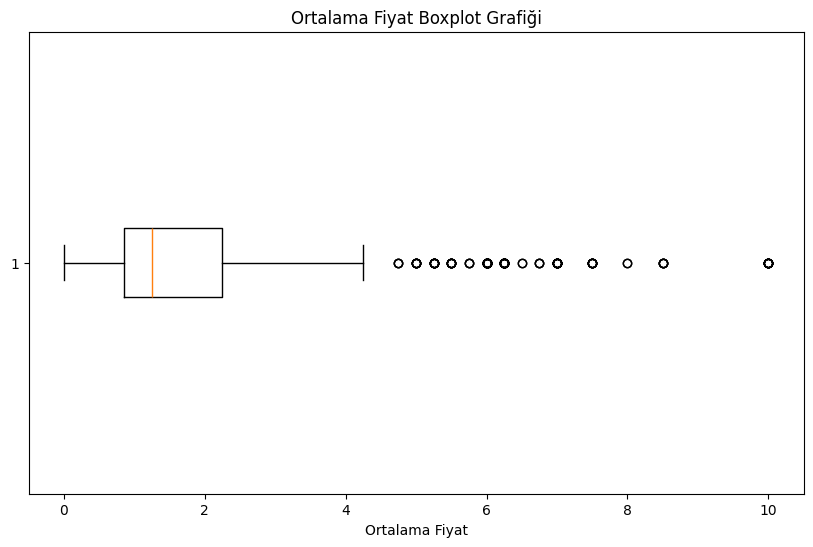

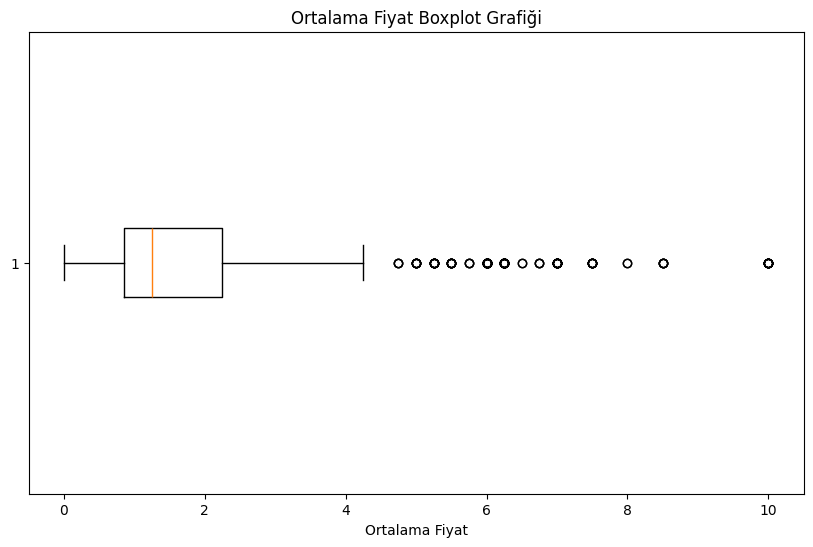

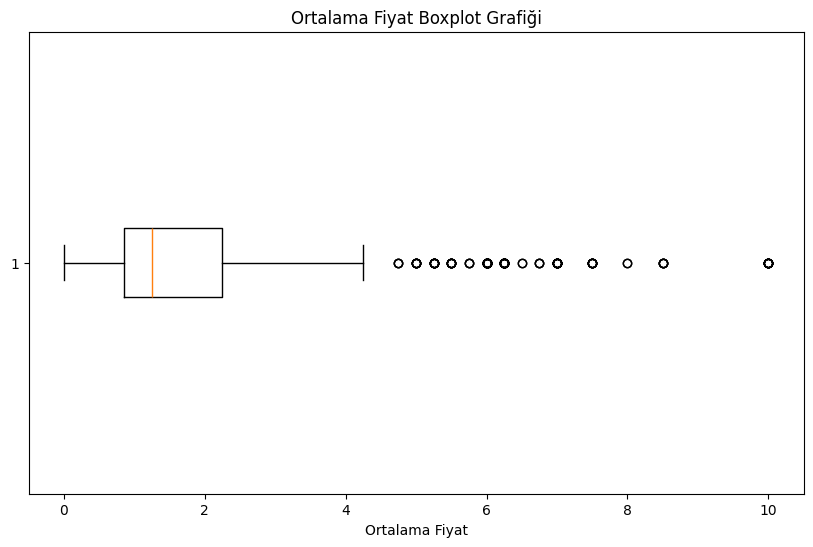

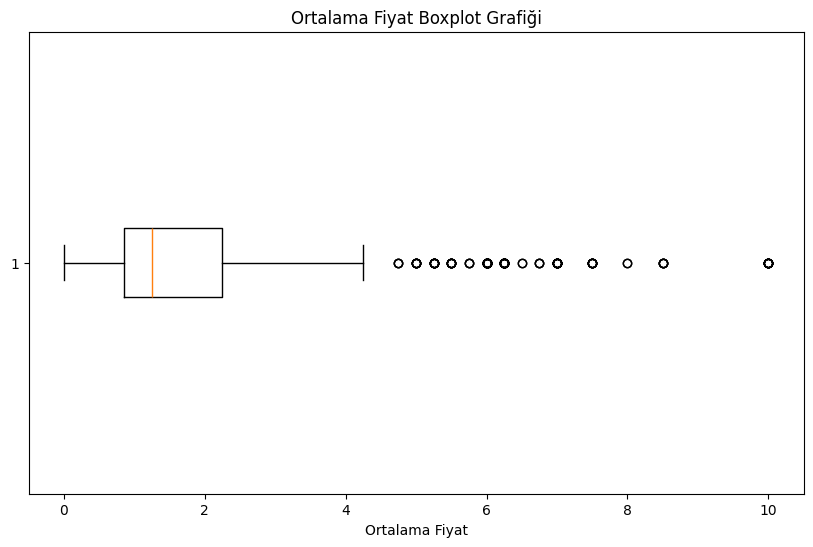